In [210]:
import matplotlib.pyplot as plt
import json
import cv2
import matplotlib.image as mpimg

In [211]:
result_filename = 'result-tiny.json'

with open(result_filename) as f:
    result = json.load(f)

In [212]:
def drawing_rectangle(image, annotations):
    h, w, channels = image.shape
    color = (255, 0, 0)
    text_color = (255, 255, 255)
    for annotation in annotations:
        # obtém as informações do resultado
        name = annotation['name']
        confidence = annotation['confidence']
        center_x, center_y = annotation['relative_coordinates']['center_x'], annotation['relative_coordinates']['center_y']
        width, height = annotation['relative_coordinates']['width'], annotation['relative_coordinates']['height']
        label = f'{name}: {confidence*100:.2f}%'

        # calcula os pontos do retangulo e do texto
        x1, y1 = int(w*(center_x - width/2)), int(h*(center_y - height/2))
        x2, y2 = int(w*(center_x + width/2)), int(h*(center_y + height/2))
        x, y = int(center_x*w), int(center_y*h)

        # desenha
        image = cv2.rectangle(image, (x1,y1), (x2, y2), color, 10)

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 2, 5)
        image = cv2.rectangle(image, (x1, y1 - 10), (x1 + w, y1-h), color, -1)
        image = cv2.putText(image, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, text_color,5)

    return image



In [213]:
images = []
for r in result:
    img = mpimg.imread(r['filename'])
    img = drawing_rectangle(img, r['objects'])
    images.append(img)


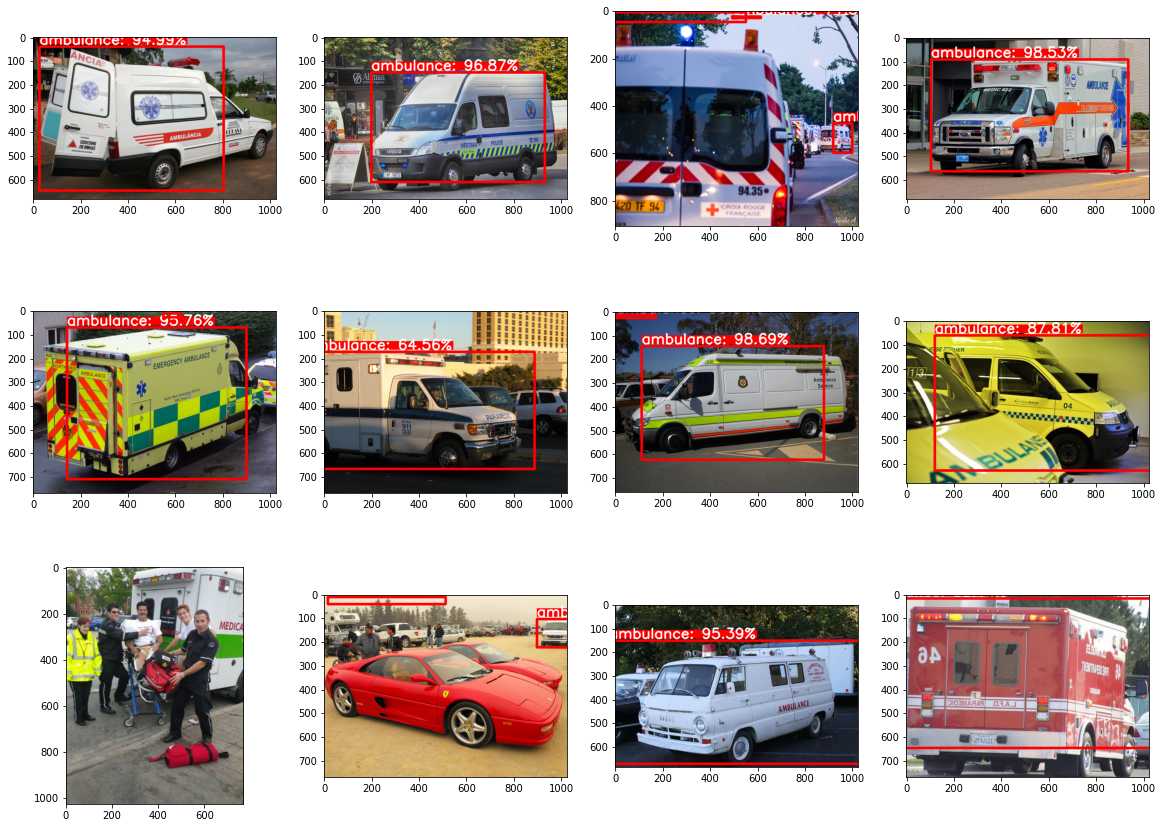

In [214]:
plt.figure(figsize=(20,20)) # specifying the overall grid size

for i in range(len(images)):
    plt.subplot(4,4,i+1)  
    plt.imshow(images[i])

plt.show()